# Trabajo Práctico 4
Armar un aplicativo que permita la generación de Transformadas de Fourier directas e inversas a imágenes.

In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt


Genero una función que transforma la imagen desde el espacio RGB al YIQ.

In [2]:
def rgb_yiq(rgb):
    yiq=np.zeros(rgb.shape)
    yiq[:,:,0] = 0.299*rgb[:,:,0] + 0.587*rgb[:,:,1] + 0.114*rgb[:,:,2]
    yiq[:,:,1] = 0.595716*rgb[:,:,0] - 0.274453*rgb[:,:,1] - 0.321263*rgb[:,:,2]
    yiq[:,:,2] = 0.211456*rgb[:,:,0] - 0.522591*rgb[:,:,1] + 0.311135*rgb[:,:,2]
    return yiq

Genero una función que transforma la imagen desde el espacio YIQ al RGB.

In [3]:
def yiq_rgb(yiq):
    rgb=np.zeros(yiq.shape)
    rgb[:,:,0] = yiq[:,:,0] + 0.9663*yiq[:,:,1] + 0.6210*yiq[:,:,2]
    rgb[:,:,1] = yiq[:,:,0] - 0.2721*yiq[:,:,1] - 0.6474*yiq[:,:,2]
    rgb[:,:,2] = yiq[:,:,0] - 1.1070*yiq[:,:,1] + 1.7046*yiq[:,:,2]
    return rgb

# Bloque principal del programa.
Leo la imagen original en RGB, la normalizo y luego se transforma al espacio YIQ.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Características de la imagen inicial
float64
(300, 451, 3)
Características de la imagen en YIQ
0.014792156862745098
0.7613882352941176


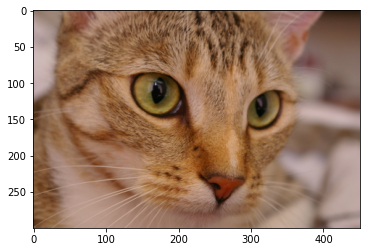

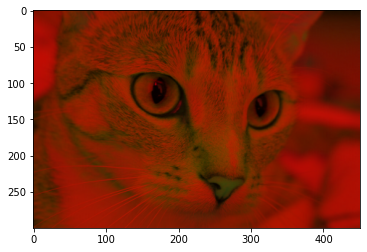

In [4]:
img1=imageio.imread('imageio:chelsea.png')/255
print("Características de la imagen inicial")
print(img1.dtype)
print(img1.shape)
plt.figure(0)
plt.imshow(img1)

img2=rgb_yiq(img1)
print('Características de la imagen en YIQ')
print(img2[:,:,0].min())
print(img2[:,:,0].max())
plt.figure(1)
plt.imshow(img2)

Aplicamos la Transformada de Fourier sobre la banda "Y" de la imagen.

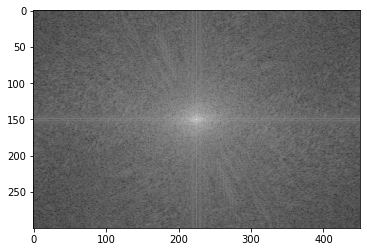

In [5]:
img3=np.fft.fftshift(np.fft.fft2(img2[:,:,0]))
plt.figure(2)
plt.imshow(np.log(np.abs(img3)),'gray')

Aplicamos la Transformada Inversa de Fourier sobre la transformación anterior.

Características de la transformada inversa de Y
(0.014792156862744862+2.292819833956871e-17j)
(0.7613882352941178-5.433603382108047e-17j)


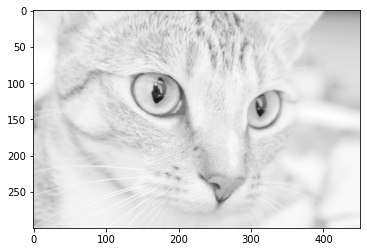

In [6]:
img4=np.fft.ifft2(np.fft.ifftshift(img3))
print('Características de la transformada inversa de Y')
print(img4.min())
print(img4.max())
plt.figure(3)
plt.imshow(np.log(np.abs(img4)),'gray')

Transformada de Fourier (2d) en un array real.

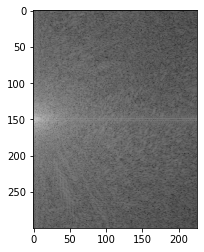

In [7]:
img5=np.fft.fftshift(np.fft.rfft2(img2[:,:,0]),axes=[0]) #Ejes: Y=0 X=1
plt.figure(4)
plt.imshow(np.log(np.abs(img5)),'gray')

Transformada Inversa de Fourier en un array real.

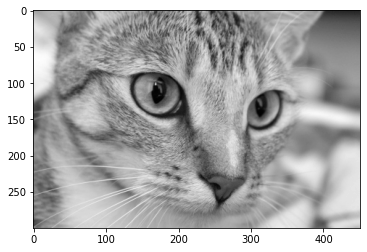

In [8]:
img6=np.fft.irfft2(np.fft.ifftshift(img5,[0]),img2[:,:,0].shape)
plt.figure(5)
plt.imshow((img6),'gray')